# This data set includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.

# It's interesting to analysis different conditions, and see how this may affect student scores in exams.

# I will see what are the most influential factors in test scores, How much exam preparation course is effective, What are the students' strengths: math, reading or writing? and other interesting questions...

In [1]:
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib notebook 
import seaborn as sns

data= pd.read_csv('StudentsPerformance.csv', encoding= 'ISO-8859-1')
del data['lunch']
data.head(20)

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75
5,female,group B,associate's degree,none,71,83,78
6,female,group B,some college,completed,88,95,92
7,male,group B,some college,none,40,43,39
8,male,group D,high school,completed,64,64,67
9,female,group B,high school,none,38,60,50


In [2]:
print(data.shape)
# The size of the data set: 
# 7 columns representing 8 different categories
# 1000 lines representing 1000 students- enough to draw conclusions :)

(1000, 7)


In [3]:
data.isnull().sum()
# Check that there is not much missing values

gender                         0
race/ethnicity                 0
parental level of education    0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
# We can see that there are no lack of values at all.

In [5]:
# Now I want to add a column that shows the student's final score (math grade, reading and writing together)
data['final grade']= (data['math score']+data['reading score']+data['writing score'])/3
data.sample(5)

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,final grade
178,female,group B,master's degree,completed,52,70,62,61.333333
509,female,group C,bachelor's degree,none,86,92,87,88.333333
317,male,group C,associate's degree,none,83,72,78,77.666667
398,male,group B,some high school,none,74,63,57,64.666667
915,female,group E,some college,none,68,70,66,68.000000


In [6]:
data.describe()
# Basic learning about the data- set

,math score,reading score,writing score,final grade
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [7]:
# The data above show that:
# 1) The average and standard deviation for the three grades is quite similar.
# 2) In the three subjects the maximum score was 100. 
# 3) Only in math had a student whose score was 0.

 # What are the students' strengths: math, reading or writing?

In [8]:
data.mean(numeric_only='true')

math score       66.089000
reading score    69.169000
writing score    68.054000
final grade      67.770667
dtype: float64

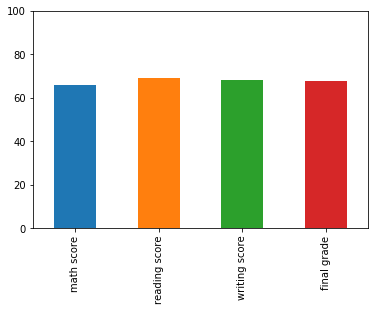

In [9]:
data.mean(numeric_only='true').plot(kind='bar', ylim= [0,100])

In [10]:
 # We can notice that the scores are quite similar, but the average math is lower than the others.

In [11]:
# Now, it is interesting to see who leads in every subject- boys or girls? 

data.groupby(['gender']).mean()

,math score,reading score,writing score,final grade
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


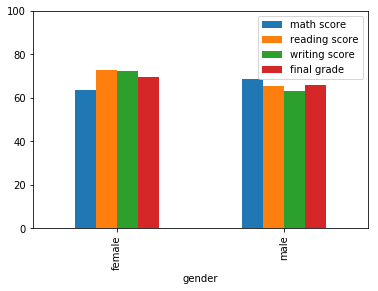

In [12]:
data.groupby(['gender']).mean().plot(ylim= [0,100], kind= 'bar')

In [13]:
# In general, the girls' final grade is higher than that of the boys.
# And if we look more deeply: girls have higher grades in reading and writing, while boys lead in math.

In [14]:
# Let's cheak out  in each subject: how many students passed the test and how many failed. 

In [15]:
data['Math_PassOrNot']= np.where(data['math score']<60, 'Failed', 'Passed')
data.Math_PassOrNot.value_counts()

Passed    677
Failed    323
Name: Math_PassOrNot, dtype: int64

In [16]:
data['Writing_PassOrNot']= np.where(data['writing score']<60, 'Failed', 'Passed')
data.Writing_PassOrNot.value_counts()

Passed    719
Failed    281
Name: Writing_PassOrNot, dtype: int64

In [17]:
data['Reading_PassOrNot']= np.where(data['reading score']<60, 'Failed', 'Passed')
data.Reading_PassOrNot.value_counts()

Passed    746
Failed    254
Name: Reading_PassOrNot, dtype: int64

In [18]:
# Math has the greatest amount of failure.

In [19]:
# Now let's cheak the distribution of passes and failures by boys and girls. 

data= data.rename({'final grade':'grade'}, axis='columns')

data['PassStatus']= np.where(data['grade']<60, 'Failed', 'Passed')
data.PassStatus.value_counts()

Passed    715
Failed    285
Name: PassStatus, dtype: int64

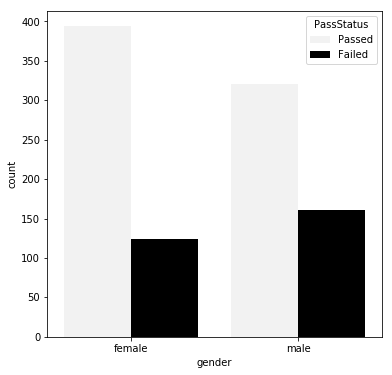

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x="gender", hue="PassStatus", data=data, color='black')
plt.show()

# How much exam preparation course is effective ?

In [21]:
data= data.rename({'test preparation course':'course'}, axis='columns')
data.head()

,gender,race/ethnicity,parental level of education,course,math score,reading score,writing score,grade,Math_PassOrNot,Writing_PassOrNot,Reading_PassOrNot,PassStatus
0,female,group B,bachelor's degree,none,72,72,74,72.666667,Passed,Passed,Passed,Passed
1,female,group C,some college,completed,69,90,88,82.333333,Passed,Passed,Passed,Passed
2,female,group B,master's degree,none,90,95,93,92.666667,Passed,Passed,Passed,Passed
3,male,group A,associate's degree,none,47,57,44,49.333333,Failed,Failed,Failed,Failed
4,male,group C,some college,none,76,78,75,76.333333,Passed,Passed,Passed,Passed


In [22]:
# We will see how many of the examinees chose to take a preparatory course.
data['course'].value_counts()

none         642
completed    358
Name: course, dtype: int64

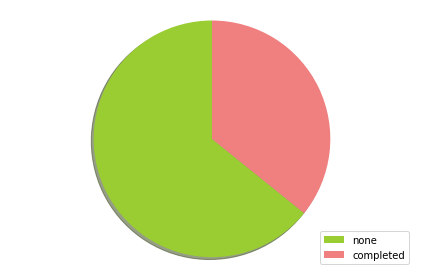

In [23]:
labels = ['none', 'completed']
sizes = [642, 358]
colors = ['yellowgreen', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [24]:
# We see that most students chose not to take a test preparation course. 

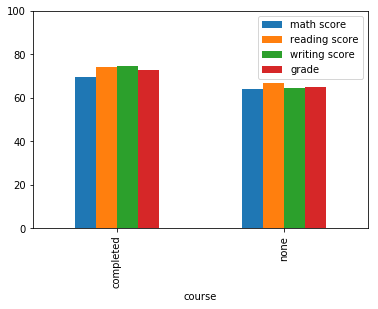

In [25]:
data.groupby(['course']).mean().plot(ylim= [0,100], kind= 'bar')

In [26]:
# we can see, in general, that students who chose to take a preparatory course were eventually given higher grades. 

# Are socio-economic factors and parental level of education affecting exam scores? 

In [27]:
# Let's examine the effect of parents' education on student scores on the various tests: 

In [28]:
data.groupby(['parental level of education']).mean()

,math score,reading score,writing score,grade
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


In [29]:
data= data.rename({'parental level of education':'parentDegree'}, axis='columns')
data.head()

,gender,race/ethnicity,parentDegree,course,math score,reading score,writing score,grade,Math_PassOrNot,Writing_PassOrNot,Reading_PassOrNot,PassStatus
0,female,group B,bachelor's degree,none,72,72,74,72.666667,Passed,Passed,Passed,Passed
1,female,group C,some college,completed,69,90,88,82.333333,Passed,Passed,Passed,Passed
2,female,group B,master's degree,none,90,95,93,92.666667,Passed,Passed,Passed,Passed
3,male,group A,associate's degree,none,47,57,44,49.333333,Failed,Failed,Failed,Failed
4,male,group C,some college,none,76,78,75,76.333333,Passed,Passed,Passed,Passed


In [30]:
# I'll rate the level of education by numbers
degree= {'high school': 1, 'some high school': 2, 'some college': 3, "associate's degree": 4, "bachelor's degree": 5, "master's degree": 6}
data.parentDegree = [degree[item] for item in data.parentDegree] 
print(data)

     gender race/ethnicity  parentDegree     course  math score  \
0    female        group B             5       none          72   
1    female        group C             3  completed          69   
2    female        group B             6       none          90   
3      male        group A             4       none          47   
4      male        group C             3       none          76   
5    female        group B             4       none          71   
6    female        group B             3  completed          88   
7      male        group B             3       none          40   
8      male        group D             1  completed          64   
9    female        group B             1       none          38   
10     male        group C             4       none          58   
11     male        group D             4       none          40   
12   female        group B             1       none          65   
13     male        group A             3  completed          7

Text(0.5,1,'Math')

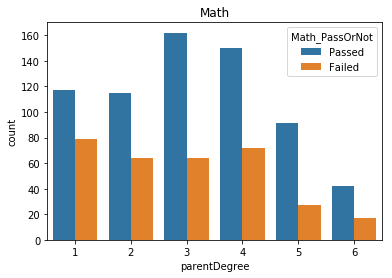

In [31]:
a= sns.countplot(x='parentDegree', data= data, hue='Math_PassOrNot')
plt.title('Math')

Text(0.5,1,'Writing')

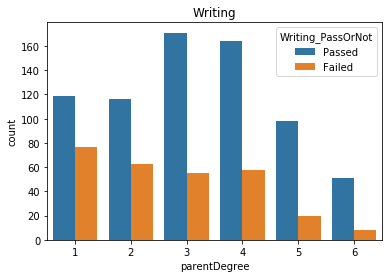

In [32]:
b= sns.countplot(x='parentDegree', data= data, hue='Writing_PassOrNot')
plt.title('Writing')

Text(0.5,1,'Reading')

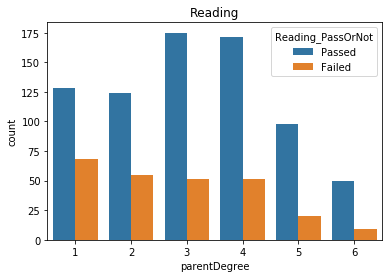

In [33]:
c= sns.countplot(x='parentDegree', data= data, hue='Reading_PassOrNot')
plt.title('Reading')

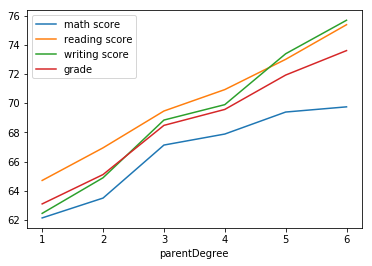

In [34]:
data.groupby(['parentDegree']).mean().plot()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


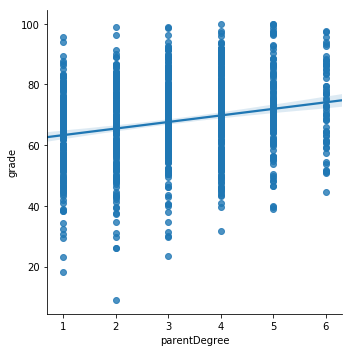

In [35]:
PD= data[['parentDegree','grade']]
sns.lmplot("parentDegree","grade",PD)

In [36]:
# We can see that the higher the parental level of education, the higher the average grade of the student. 

In [37]:
data.groupby(['race/ethnicity','parentDegree']).mean()

math score  reading score  writing score  \
race/ethnicity parentDegree                                             
group A        1              60.444444      62.888889      60.500000   
               2              58.916667      62.083333      58.583333   
               3              63.888889      65.777778      65.000000   
               4              61.000000      67.071429      63.571429   
               5              67.166667      68.083333      68.333333   
               6              57.666667      64.666667      67.666667   
group B        1              59.791667      63.458333      61.250000   
               2              61.815789      66.447368      64.605263   
               3              63.189189      65.756757      64.189189   
               4              66.097561      69.585366      68.243902   
               5              69.300000      72.950000      71.650000   
               6              67.166667      80.166667      77.166667   
group C        1              60.906250      64.421875      61.656250   
               2              60.551020      65.632653      63.285714   
               3              65.130435      69.420290      68.869565   
               4              66.730769      71.128205      70.269231   
               5              68.150000      75.675000      75.900000   
               6              67.052632      70.526316      69.526316   
group D        1              62.863636      64.409091      63.159091   
               2              66.760000      69.980000      69.100000   
               3              68.731343      70.880597      71.701493   
               4              67.600000      70.540000      69.860000   
               5              67.571429      70.142857      71.892857   
               6              72.521739      77.173913      79.739130   
group E        1              70.772727      70.318182      67.545455   
               2              72.111111      69.555556      66.555556   
               3              73.828571      72.628571      70.200000   
               4              74.897436      73.820513      73.205128   
               5              76.555556      74.833333      75.388889   
               6              74.625000      82.125000      80.500000   

                                 grade  
race/ethnicity parentDegree             
group A        1             61.277778  
               2             59.861111  
               3             64.888889  
               4             63.880952  
               5             67.861111  
               6             63.333333  
group B        1             61.500000  
               2             64.289474  
               3             64.378378  
               4             67.975610  
               5             71.300000  
               6             74.833333  
group C        1             62.328125  
               2             63.156463  
               3             67.806763  
               4             69.376068  
               5             73.241667  
               6             69.035088  
group D        1             63.477273  
               2             68.613333  
               3             70.437811  
               4             69.333333  
               5             69.869048  
               6             76.478261  
group E        1             69.545455  
               2             69.407407  
               3             72.219048  
               4             73.974359  
               5             75.592593  
               6             79.083333

In [38]:
RE= data.groupby(['race/ethnicity']).mean()
RE

,parentDegree,math score,reading score,writing score,grade
race/ethnicity,,,,,
group A,2.853933,61.629213,64.674157,62.674157,62.992509
group B,2.815789,63.452632,67.352632,65.600000,65.468421
group C,3.119122,64.463950,69.103448,67.827586,67.131661
group D,3.141221,67.362595,70.030534,70.145038,69.179389
group E,3.264286,73.821429,73.028571,71.407143,72.752381


In [39]:
def Plot_Set(data,X,Ys):
    fig,axarr = plt.subplots(1,3,figsize=(12,5))
    for id,y in enumerate(Ys):
        avgs = data.groupby([X])[y].mean().values
        pos = range(len(avgs))
        sns.boxplot(x=X, y=y, data=data, ax=axarr[id])
        axarr[id].set_ylim([0,105])
        plt.setp(axarr[id].get_xticklabels(), rotation=30) 
    plt.tight_layout()
    plt.show()

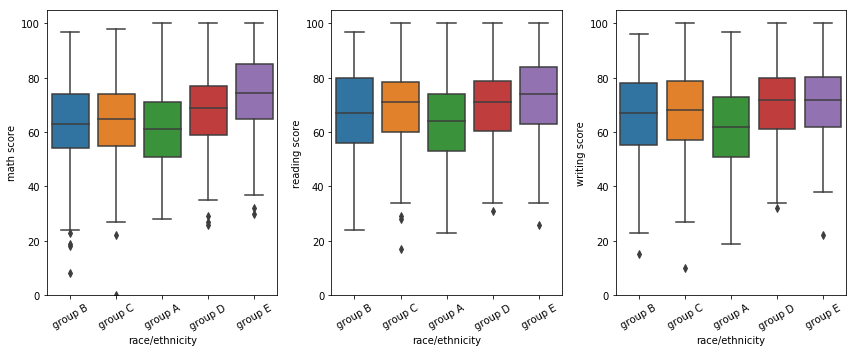

In [40]:
Plot_Set(data,X='race/ethnicity',Ys=['math score','reading score','writing score'])

In [41]:
data= data.rename({'race/ethnicity':'race'}, axis='columns')
data.head()

,gender,race,parentDegree,course,math score,reading score,writing score,grade,Math_PassOrNot,Writing_PassOrNot,Reading_PassOrNot,PassStatus
0,female,group B,5,none,72,72,74,72.666667,Passed,Passed,Passed,Passed
1,female,group C,3,completed,69,90,88,82.333333,Passed,Passed,Passed,Passed
2,female,group B,6,none,90,95,93,92.666667,Passed,Passed,Passed,Passed
3,male,group A,4,none,47,57,44,49.333333,Failed,Failed,Failed,Failed
4,male,group C,3,none,76,78,75,76.333333,Passed,Passed,Passed,Passed


In [42]:
newRace= {'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5}
data.race = [newRace[item] for item in data.race] 
print(data)

     gender  race  parentDegree     course  math score  reading score  \
0    female     2             5       none          72             72   
1    female     3             3  completed          69             90   
2    female     2             6       none          90             95   
3      male     1             4       none          47             57   
4      male     3             3       none          76             78   
5    female     2             4       none          71             83   
6    female     2             3  completed          88             95   
7      male     2             3       none          40             43   
8      male     4             1  completed          64             64   
9    female     2             1       none          38             60   
10     male     3             4       none          58             54   
11     male     4             4       none          40             52   
12   female     2             1       none         

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


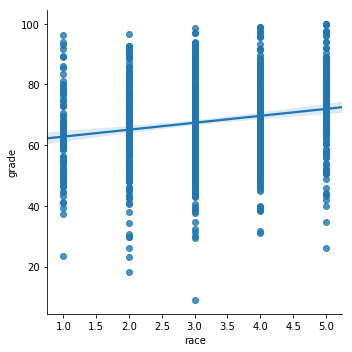

In [43]:
sns.lmplot("race","grade",data)

# Now, we'll find a model that best predicts a student's grade in  the test

 # First Model: KNN

In [44]:
# I saw that the grades in the various subjects were quite similar to each other, and to the general average
# For this reason, I will only work with the final score.

# I will divide the various grades into several groups, as follows:

def getGrade(grade, PassStatus):
    if(PassStatus=='Failed'):
        return 'F'
    if(grade>=90):
        return 'A'
    if(grade>=80):
        return 'B'
    if(grade>=70):
        return 'C'
    if(grade>=60):
        return 'D'
    else:
        return 'F'
    
data['Grade'] = data.apply(lambda x: getGrade(x['grade'], x['PassStatus']), axis=1)
data.Grade.value_counts()

F    285
C    261
D    256
B    146
A     52
Name: Grade, dtype: int64

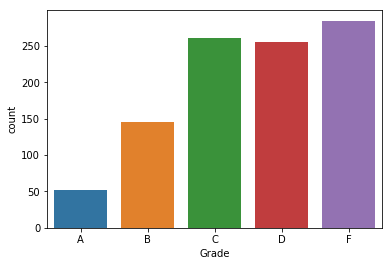

In [45]:
sns.countplot(x="Grade", data=data, order=['A','B','C','D','F'])
plt.show()

In [46]:
new_gender= {'female': 0, 'male': 1}
data.gender= [new_gender[item] for item in data.gender]
print(data)

     gender  race  parentDegree     course  math score  reading score  \
0         0     2             5       none          72             72   
1         0     3             3  completed          69             90   
2         0     2             6       none          90             95   
3         1     1             4       none          47             57   
4         1     3             3       none          76             78   
5         0     2             4       none          71             83   
6         0     2             3  completed          88             95   
7         1     2             3       none          40             43   
8         1     4             1  completed          64             64   
9         0     2             1       none          38             60   
10        1     3             4       none          58             54   
11        1     4             4       none          40             52   
12        0     2             1       none         

In [47]:
new_course= {'none': 0, 'completed': 1}
data.course= [new_course[item] for item in data.course] 
print(data)

     gender  race  parentDegree  course  math score  reading score  \
0         0     2             5       0          72             72   
1         0     3             3       1          69             90   
2         0     2             6       0          90             95   
3         1     1             4       0          47             57   
4         1     3             3       0          76             78   
5         0     2             4       0          71             83   
6         0     2             3       1          88             95   
7         1     2             3       0          40             43   
8         1     4             1       1          64             64   
9         0     2             1       0          38             60   
10        1     3             4       0          58             54   
11        1     4             4       0          40             52   
12        0     2             1       0          65             81   
13        1     1   

In [48]:
# I changed all the non-numeric values to numeric values.

In [49]:
data.head()

,gender,race,parentDegree,course,math score,reading score,writing score,grade,Math_PassOrNot,Writing_PassOrNot,Reading_PassOrNot,PassStatus,Grade
0,0,2,5,0,72,72,74,72.666667,Passed,Passed,Passed,Passed,C
1,0,3,3,1,69,90,88,82.333333,Passed,Passed,Passed,Passed,B
2,0,2,6,0,90,95,93,92.666667,Passed,Passed,Passed,Passed,A
3,1,1,4,0,47,57,44,49.333333,Failed,Failed,Failed,Failed,F
4,1,3,3,0,76,78,75,76.333333,Passed,Passed,Passed,Passed,C


In [50]:
data_feature= data[['gender','race','course','parentDegree']].copy()
##data_feature= pd.DataFrame([data.gender,data.race,data.course,data.parentDegree]).transpose()

In [51]:
# I will look at my classification problem from two directions: 
# one, as a multi-class classification (using 'Grade' column for y)
# second, as a binary classification (using 'PassStatus' column for y)

In [52]:
new_PassStatus= {'Passed': 1, 'Failed': 0}
data.PassStatus= [new_PassStatus[item] for item in data.PassStatus] 
print(data)

     gender  race  parentDegree  course  math score  reading score  \
0         0     2             5       0          72             72   
1         0     3             3       1          69             90   
2         0     2             6       0          90             95   
3         1     1             4       0          47             57   
4         1     3             3       0          76             78   
5         0     2             4       0          71             83   
6         0     2             3       1          88             95   
7         1     2             3       0          40             43   
8         1     4             1       1          64             64   
9         0     2             1       0          38             60   
10        1     3             4       0          58             54   
11        1     4             4       0          40             52   
12        0     2             1       0          65             81   
13        1     1   

In [53]:
#one 

X= data_feature
y1= data.Grade

print(X)

     gender  race  course  parentDegree
0         0     2       0             5
1         0     3       1             3
2         0     2       0             6
3         1     1       0             4
4         1     3       0             3
5         0     2       0             4
6         0     2       1             3
7         1     2       0             3
8         1     4       1             1
9         0     2       0             1
10        1     3       0             4
11        1     4       0             4
12        0     2       0             1
13        1     1       1             3
14        0     1       0             6
15        0     3       0             2
16        1     3       0             1
17        0     2       0             2
18        1     3       1             6
19        0     3       0             4
20        1     4       0             1
21        0     2       1             3
22        1     4       0             3
23        0     3       0             2


In [54]:
#second

X= data_feature
y2= data.PassStatus

- TRAIN\TEST SPLIT

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=2) #1

In [56]:
print(X.shape)
print(y1.shape)
print(y1_train)

(1000, 4)
(1000,)
90     C
305    D
126    D
963    C
163    F
111    F
702    B
859    C
868    C
453    F
719    B
728    B
327    F
502    F
72     F
2      A
573    D
825    D
620    F
12     C
803    B
883    F
688    F
427    D
108    D
740    C
969    C
181    F
923    D
948    F
      ..
51     C
875    C
938    B
772    D
102    B
195    F
679    D
805    C
628    F
124    C
404    F
730    C
287    C
831    B
47     C
725    C
587    F
607    F
433    F
674    C
263    A
360    F
75     F
466    F
299    B
534    C
584    C
493    B
527    F
168    C
Name: Grade, Length: 700, dtype: object


In [57]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=2) #2

In [58]:
print(X.shape)
print(y2.shape)
print(y2_train)

(1000, 4)
(1000,)
90     1
305    1
126    1
963    1
163    0
111    0
702    1
859    1
868    1
453    0
719    1
728    1
327    0
502    0
72     0
2      1
573    1
825    1
620    0
12     1
803    1
883    0
688    0
427    1
108    1
740    1
969    1
181    0
923    1
948    0
      ..
51     1
875    1
938    1
772    1
102    1
195    0
679    1
805    1
628    0
124    1
404    0
730    1
287    1
831    1
47     1
725    1
587    0
607    0
433    0
674    1
263    1
360    0
75     0
466    0
299    1
534    1
584    1
493    1
527    0
168    1
Name: PassStatus, Length: 700, dtype: int64


In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier(n_neighbors=30)

In [61]:
#1
knn.fit(X_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [63]:
print(knn.predict(X_test))
print(y1_test)
print("test:")
print(knn.score(X_test,y1_test))
print("train:")
print(knn.score(X_train, y1_train))

['F' 'B' 'D' 'F' 'F' 'C' 'F' 'C' 'D' 'C' 'C' 'D' 'C' 'F' 'D' 'F' 'D' 'C'
 'C' 'C' 'F' 'D' 'F' 'F' 'C' 'C' 'F' 'D' 'C' 'C' 'F' 'C' 'D' 'C' 'C' 'F'
 'F' 'F' 'F' 'C' 'C' 'D' 'C' 'D' 'F' 'C' 'F' 'B' 'F' 'C' 'F' 'C' 'F' 'F'
 'C' 'F' 'C' 'C' 'D' 'C' 'C' 'D' 'C' 'D' 'F' 'F' 'F' 'C' 'D' 'D' 'F' 'F'
 'C' 'C' 'C' 'C' 'F' 'D' 'D' 'F' 'C' 'C' 'F' 'C' 'C' 'F' 'F' 'F' 'C' 'F'
 'C' 'F' 'F' 'F' 'D' 'D' 'D' 'A' 'F' 'C' 'D' 'C' 'C' 'F' 'C' 'F' 'F' 'C'
 'C' 'B' 'C' 'C' 'F' 'C' 'F' 'C' 'C' 'C' 'D' 'F' 'C' 'D' 'F' 'C' 'F' 'F'
 'F' 'F' 'D' 'F' 'D' 'C' 'D' 'F' 'C' 'F' 'D' 'D' 'D' 'C' 'C' 'F' 'C' 'C'
 'C' 'F' 'C' 'F' 'C' 'F' 'D' 'F' 'D' 'C' 'C' 'F' 'C' 'F' 'D' 'D' 'F' 'F'
 'F' 'F' 'D' 'C' 'C' 'F' 'C' 'C' 'F' 'F' 'C' 'F' 'F' 'C' 'C' 'D' 'F' 'C'
 'F' 'F' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'D' 'C' 'F' 'F' 'F' 'D' 'F' 'D'
 'D' 'F' 'C' 'F' 'C' 'C' 'C' 'C' 'F' 'D' 'F' 'C' 'C' 'F' 'F' 'D' 'C' 'C'
 'F' 'F' 'C' 'F' 'B' 'D' 'D' 'F' 'C' 'F' 'F' 'D' 'F' 'D' 'F' 'F' 'C' 'C'
 'D' 'D' 'F' 'F' 'D' 'F' 'C' 'C' 'F' 'F' 'D' 'F' 'F

In [64]:
from sklearn import metrics

y1_pred= knn.predict(X_test)
print(metrics.accuracy_score(y1_test, y1_pred))

0.35333333333333333


In [68]:
# I want to find the ideal k, which will bring me the highest accuracy (in "test")
k1_range = list(range(1, 56))
scores1 = []
for k1 in k1_range:
    knn = KNeighborsClassifier(n_neighbors=k1)
    knn.fit(X_train, y1_train)
    y1_pred = knn.predict(X_test)
    scores1.append(metrics.accuracy_score(y1_test, y1_pred))

Text(0,0.5,'Testing Accuracy')

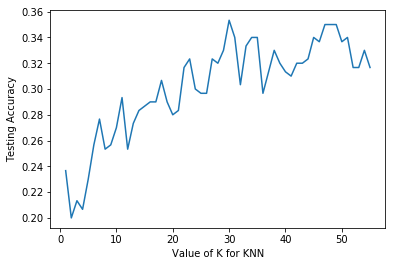

In [69]:
# the connection between K and testing accuracy
plt.plot(k1_range, scores1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [70]:
# From the above graph it can be concluded that the ideal k in that case is k=30.
# In addition we can see that KNN is not such a good model for my problem, because the success rates of almost every k are very low.

In [71]:
#2
knn.fit(X_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=55, p=2,
           weights='uniform')

In [72]:
print(knn.predict(X_test))
print(y2_test)
print("test:")
print(knn.score(X_test,y2_test))
print("train:")
print(knn.score(X_train, y2_train))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
37     0
726    1
846    1
295    1
924    1
658    0
682    0
286    1
880    1
272    0
137    1
954    1
515    1
788    1
860    0
640    0
737    1
683    0
412    1
71     1
213    0
67     1
231    0
856    1
197    0
639    1
376    1
192    1
99     1
678    1
      ..
752    1
257    1
317    1
496    0
4      1
710    1
198    0
116    1
204    0
692    1
174    0
701    1
202

In [73]:
from sklearn import metrics

y2_pred= knn.predict(X_test)
print(metrics.accuracy_score(y2_test, y2_pred))

0.7166666666666667


In [74]:
# I want to find the ideal k, which will bring me the highest accuracy (in "test")
k2_range = list(range(1, 56))
scores2 = []
for k2 in k2_range:
    knn = KNeighborsClassifier(n_neighbors=k2)
    knn.fit(X_train, y2_train)
    y2_pred = knn.predict(X_test)
    scores1.append(metrics.accuracy_score(y2_test, y2_pred))

In [76]:
# the connection between K and testing accuracy
##plt.plot(k2_range, scores2)
##plt.xlabel('Value of K for KNN')
##plt.ylabel('Testing Accuracy')

- CROSS VALIDATION

In [77]:
# I'll use the K-FOLD cross validator to simulate splitting a dataset of 30 observations into 5 folds
from sklearn.model_selection import KFold
kf= KFold(n_splits=5)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [78]:
#1

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]

TRAIN: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433
 434 435 436 437 438 439 440 441 442 443 444

KeyError: '[200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217\n 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235\n 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253\n 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271\n 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289\n 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307\n 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325\n 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343\n 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361\n 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379\n 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397\n 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415\n 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433\n 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451\n 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469\n 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487\n 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505\n 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523\n 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541\n 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559\n 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577\n 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595\n 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613\n 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631\n 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649\n 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667\n 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685\n 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702 703\n 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721\n 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739\n 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757\n 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773 774 775\n 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792 793\n 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809 810 811\n 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827 828 829\n 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845 846 847\n 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863 864 865\n 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881 882 883\n 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899 900 901\n 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917 918 919\n 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935 936 937\n 938 939 940 941 942 943 944 945 946 947 948 949 950 951 952 953 954 955\n 956 957 958 959 960 961 962 963 964 965 966 967 968 969 970 971 972 973\n 974 975 976 977 978 979 980 981 982 983 984 985 986 987 988 989 990 991\n 992 993 994 995 996 997 998 999] not in index'

In [79]:
kf= KFold(n_splits=5).split(range(30))
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]       [0 1 2 3 4 5]      
    2     [ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]    [ 6  7  8  9 10 11]   
    3     [ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27 28 29]    [12 13 14 15 16 17]   
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 24 25 26 27 28 29]    [18 19 20 21 22 23]   
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]    [24 25 26 27 28 29]   


In [80]:
# Select the best tuning parameters for KNN on my dataset
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=30)
scores1 = cross_val_score(knn, X, y1, cv=10, scoring='accuracy')
print(scores1)

[0.22330097 0.35294118 0.35643564 0.2970297  0.34653465 0.31
 0.31632653 0.2755102  0.31632653 0.30612245]


In [81]:
print(scores1.mean())

0.3100527861630089


In [82]:
# search for an optimal value of K for KNN
k1_range = list(range(1, 55))
k1_scores = []
for k1 in k1_range:
    knn = KNeighborsClassifier(n_neighbors=k1)
    scores1 = cross_val_score(knn, X, y1, cv=10, scoring='accuracy')
    k1_scores.append(scores1.mean())
print(k1_scores)

[0.26903499913855766, 0.24315895082439395, 0.2358840714792117, 0.2529303394529012, 0.24715141571383917, 0.2623539317870761, 0.29224326519995675, 0.2820698809947895, 0.27528877985876654, 0.2860807945594849, 0.27926797776690215, 0.2904691111088288, 0.30013255953155077, 0.30244436911552086, 0.2913613299592643, 0.2954944395137657, 0.29431198406499004, 0.3005117165581988, 0.31542638568452463, 0.3033144144517366, 0.31027973073301224, 0.31636315816339033, 0.30701682557094734, 0.32313019765245327, 0.3103509110651855, 0.32109871686827185, 0.32609258826091236, 0.3151581522352284, 0.3200075952711182, 0.3100527861630089, 0.32207038532033017, 0.32404860008023195, 0.32105910725339826, 0.3080533278388737, 0.3060620458892006, 0.30905351632145694, 0.30709609234446444, 0.3119677383209364, 0.31409689831907006, 0.31803848118118727, 0.31406757231393945, 0.32106087260435273, 0.306093120281853, 0.3029754030613495, 0.30935500721484405, 0.3022323697526689, 0.31406716026793297, 0.32409871121379435, 0.3130764845

Text(0,0.5,'Cross-Validated Accuracy')

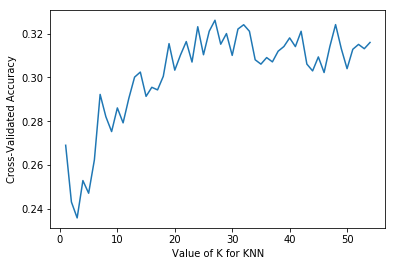

In [83]:
plt.plot(k1_range, k1_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [84]:
# We can see that the results for the optimal-K for KNN are quite similar in the train\test split and the cross-validation. 
# Up to k=30 the accuracy percentage increases, and then they rise a little and sometimes go down a bit, but not radically.
# But again, the accuracy is not high at all, and in the cross-validation accuracy rates are even lower than before (train\test split).

In [85]:
# I did cross validation to select the optimal k value
# Now I want to check what the optimal values are for other values in the KNN model. 

In [86]:
# Let's look for the optimal value for: weights. 

*From the various statistics I made at the beginning of the notebook, I came to the following conclusions:*
1. gender: *females* have higher chance that their final grade will be higher than *males*.
2. course: students who completed a test preparation course are more likely to succeed than students who have not taken a course like this (*none*).
3. parental level of education: the connection between the grade and the parents' education is linear.
4. race/ethnicity: Influence a bit about the final grade, in a linear connection, but not very much. 

In [87]:
knn = KNeighborsClassifier(n_neighbors=30, weights='distance')
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='distance')


In [88]:
knn.fit(X_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='distance')

In [89]:
print(knn.predict(X_test))
print(y1_test)
print("test:")
print(knn.score(X_test,y1_test))
print("train:")
print(knn.score(X_train, y1_train))

['F' 'B' 'C' 'F' 'F' 'C' 'F' 'C' 'B' 'C' 'C' 'D' 'C' 'C' 'D' 'F' 'A' 'C'
 'F' 'B' 'F' 'D' 'C' 'F' 'C' 'C' 'F' 'C' 'C' 'F' 'D' 'F' 'C' 'C' 'C' 'D'
 'F' 'D' 'B' 'C' 'F' 'D' 'C' 'D' 'F' 'C' 'F' 'B' 'F' 'A' 'F' 'C' 'F' 'F'
 'C' 'F' 'C' 'C' 'D' 'C' 'C' 'F' 'C' 'A' 'F' 'F' 'F' 'D' 'C' 'D' 'F' 'F'
 'D' 'C' 'F' 'D' 'F' 'D' 'D' 'F' 'B' 'C' 'A' 'B' 'A' 'F' 'F' 'F' 'C' 'D'
 'D' 'F' 'F' 'F' 'D' 'A' 'A' 'A' 'F' 'D' 'D' 'D' 'C' 'F' 'D' 'F' 'F' 'D'
 'F' 'D' 'C' 'B' 'F' 'A' 'F' 'B' 'A' 'C' 'A' 'F' 'C' 'D' 'F' 'F' 'F' 'F'
 'F' 'B' 'D' 'F' 'F' 'C' 'B' 'C' 'C' 'F' 'D' 'D' 'D' 'F' 'C' 'C' 'C' 'C'
 'C' 'D' 'D' 'F' 'D' 'F' 'F' 'F' 'D' 'C' 'A' 'A' 'F' 'D' 'D' 'D' 'F' 'F'
 'D' 'F' 'C' 'D' 'C' 'D' 'B' 'C' 'A' 'F' 'A' 'D' 'B' 'C' 'C' 'C' 'B' 'C'
 'F' 'F' 'D' 'F' 'D' 'B' 'A' 'C' 'C' 'C' 'D' 'C' 'F' 'B' 'A' 'D' 'F' 'A'
 'D' 'F' 'C' 'F' 'C' 'C' 'C' 'C' 'F' 'D' 'D' 'C' 'F' 'A' 'F' 'A' 'C' 'D'
 'F' 'F' 'C' 'F' 'D' 'D' 'B' 'B' 'D' 'F' 'F' 'C' 'C' 'F' 'C' 'F' 'A' 'F'
 'A' 'D' 'F' 'F' 'D' 'D' 'F' 'B' 'F' 'F' 'D' 'F' 'F

In [90]:
# It was better when the weigth was 'uniform'. 

In [91]:
#1

kf= KFold(n_splits=5).split(range(30))
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]       [0 1 2 3 4 5]      
    2     [ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]    [ 6  7  8  9 10 11]   
    3     [ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27 28 29]    [12 13 14 15 16 17]   
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 24 25 26 27 28 29]    [18 19 20 21 22 23]   
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]    [24 25 26 27 28 29]   


In [92]:
# Select the best tuning parameters for KNN on my dataset
knn = KNeighborsClassifier(n_neighbors=30)
scores2 = cross_val_score(knn, X, y2, cv=10, scoring='accuracy')
print(scores2)

[0.69306931 0.71287129 0.69306931 0.69306931 0.74257426 0.73737374
 0.6969697  0.70707071 0.66666667 0.68686869]


In [93]:
print(scores2.mean())

0.7029602960296029


In [94]:
# search for an optimal value of K for KNN
k2_range = list(range(1, 55))
k2_scores = []
for k2 in k2_range:
    knn = KNeighborsClassifier(n_neighbors=k2)
    scores2 = cross_val_score(knn, X, y2, cv=10, scoring='accuracy')
    k2_scores.append(scores2.mean())
print(k2_scores)

[0.6251725172517252, 0.5530653065306531, 0.646934693469347, 0.613091309130913, 0.674007400740074, 0.6298829882988299, 0.6882488248824882, 0.6581258125812581, 0.6772177217721772, 0.6601660166016602, 0.6841284128412841, 0.6782078207820781, 0.6871987198719871, 0.6782078207820782, 0.6931593159315932, 0.6940694069406941, 0.6981098109810981, 0.6931593159315932, 0.6940694069406941, 0.6931593159315932, 0.6981098109810981, 0.6991399139913991, 0.708070807080708, 0.708070807080708, 0.7131213121312131, 0.7140714071407139, 0.7191819181918191, 0.714151415141514, 0.712011201120112, 0.7029602960296029, 0.7089808980898089, 0.7129612961296129, 0.7150215021502151, 0.7120912091209121, 0.715001500150015, 0.71001100110011, 0.706030603060306, 0.706070607060706, 0.714071407140714, 0.7140914091409141, 0.719021902190219, 0.7150815081508151, 0.719041904190419, 0.716051605160516, 0.717041704170417, 0.7111011101110111, 0.717041704170417, 0.716051605160516, 0.718031803180318, 0.7140914091409141, 0.717041704170417, 

Text(0,0.5,'Cross-Validated Accuracy')

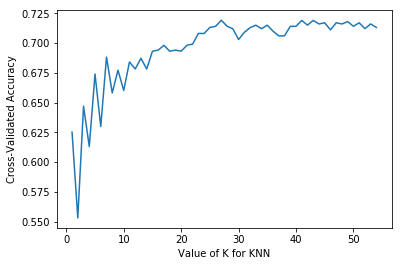

In [95]:
plt.plot(k2_range, k2_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [96]:
# From this chart it seems that the ideal k is k=27. 

**Error models**

- Classification accuracy

In [97]:
# For convenience, I'll choose to look at the problem as binary classification problem. 

X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=2)
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y2_train)
y2_pred_knn= knn.predict(X_test)

In [98]:
# calculate accuracy
print(metrics.accuracy_score(y2_test, y2_pred_knn))

0.73


In [ ]:
# KNN accuracy is 73%

In [99]:
# Distribution of results of the testing set. 
y2_test.value_counts()

1    216
0     84
Name: PassStatus, dtype: int64

In [101]:
# calculate the percentage of ones
y2_test.mean()

0.72

In [103]:
# calculate the percentage of zeros
1 - y2_test.mean()

0.28

In [ ]:
# Null accuracy: accuracy that could be achieved by always predicting the most frequent class.

In [105]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y2_test.mean(), 1 - y2_test.mean())

0.72

In [111]:
# calculate null accuracy (for multi-class classification problems)
y1_test.value_counts().head(1) / len(y1_test)

F    0.28
Name: Grade, dtype: float64

In [112]:
# Comparing the true and predicted response values

# print the first 25 true and predicted responses
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_knn[0:25])

True: [0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0]
Pred: [1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Now, I want to see what "types" of errors my classifier is making. 

- Confusion matrix

In [113]:
# first argument is true values, second argument is predicted values. 

print(metrics.confusion_matrix(y2_test, y2_pred_knn))

[[ 10  74]
 [  7 209]]


In [115]:
confusion = metrics.confusion_matrix(y2_test, y2_pred_knn)

1) Type 1 error: False Positive
    
    we *incorrectly* predicted that they *would* pass the test
    when a prediction is wrong & predicted value is positive 

In [117]:
FP = confusion[0, 1]

2) Type 2 error: False Negative
    
    we *incorrectly* predicted that they *wouldn't* pass the test ( fail )
    when a prediction is wrong & predicted value is Negative

In [118]:
FN = confusion[1, 0]

3) True Positive

   we *correctly* predicted that they *would* pass the test
   
4) True Negative

   we *correctly* predicted that they *wouldn't* pass the test ( fail )

In [120]:
TP = confusion[1, 1]
TN = confusion[0, 0]

In [124]:
# Classification Accuracy:

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y2_test, y2_pred_knn))

0.73
0.73


In [126]:
# Classification Error (or: Misclassification Rate):

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y2_test, y2_pred_knn))

0.27
0.27


In [127]:
# Sensitivity (or: True Positive Rate\ Recall)
# When the actual value is positive (pass), how often is the prediction correct?

print(TP / float(TP + FN))
print(metrics.recall_score(y2_test, y2_pred_knn))

0.9675925925925926
0.9675925925925926


In [128]:
# Specificity:
# When the actual value is negative (fail), how often is the prediction correct?

print(TN / float(TN + FP))

0.11904761904761904


In [129]:
# False Positive Rate:
# When the actual value is negative, how often is the prediction incorrect?

print(FP / float(TN + FP))

0.8809523809523809


In [130]:
# Precision: 
# When a positive value is predicted, how often is the prediction correct?

print(TP / float(TP + FP))
print(metrics.precision_score(y2_test, y2_pred_knn))

0.7385159010600707
0.7385159010600707


- F1 score matrix

  a function of Precision and Recall. 

In [131]:
# We want to seek a balance between Precision and Recall.

from sklearn.metrics import f1_score

f1_score(y2_test, y2_pred_knn) #defult average='binary'

0.8376753507014029

In [132]:
f1_score(y2_test, y2_pred_knn, average='macro')

0.5178475763408005

In [133]:
f1_score(y2_test, y2_pred_knn, average='micro')

0.7299999999999999

In [134]:
f1_score(y2_test, y2_pred_knn, average='weighted')

0.6585717970594654

In [135]:
f1_score(y2_test, y2_pred_knn, average=None)

array([0.1980198 , 0.83767535])

In [136]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, y2_pred_knn))

             precision    recall  f1-score   support

          0       0.59      0.12      0.20        84
          1       0.74      0.97      0.84       216

avg / total       0.70      0.73      0.66       300



- ROC Curve and Area Under the Curve (AUC)

In [141]:
y2_pred_knn_prob = knn.predict_proba(X_test)[:, 1]
y2_pred_knn_prob

array([0.59259259, 0.81481481, 0.81481481, 0.48148148, 0.62962963,
       0.74074074, 0.48148148, 0.85185185, 0.81481481, 0.74074074,
       0.7037037 , 0.66666667, 0.7037037 , 0.62962963, 0.66666667,
       0.62962963, 0.88888889, 0.7037037 , 0.66666667, 0.88888889,
       0.66666667, 0.66666667, 0.62962963, 0.59259259, 0.7037037 ,
       0.74074074, 0.59259259, 0.66666667, 0.77777778, 0.66666667,
       0.66666667, 0.66666667, 0.81481481, 0.77777778, 0.88888889,
       0.40740741, 0.62962963, 0.66666667, 0.62962963, 0.74074074,
       0.66666667, 0.7037037 , 0.77777778, 0.7037037 , 0.51851852,
       0.77777778, 0.48148148, 0.81481481, 0.62962963, 0.92592593,
       0.59259259, 0.88888889, 0.44444444, 0.51851852, 0.77777778,
       0.59259259, 0.74074074, 0.77777778, 0.88888889, 0.77777778,
       0.74074074, 0.7037037 , 0.85185185, 0.88888889, 0.66666667,
       0.48148148, 0.51851852, 0.7037037 , 0.66666667, 0.66666667,
       0.62962963, 0.62962963, 0.81481481, 0.77777778, 0.77777

Text(0,0.5,'Frequency')

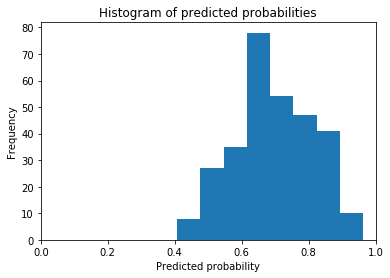

In [142]:
plt.hist(y2_pred_knn_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

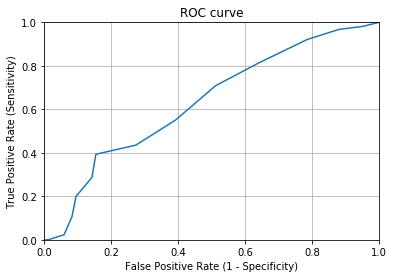

In [143]:
fpr, tpr, thresholds = metrics.roc_curve(y2_test, y2_pred_knn_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [144]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [145]:
evaluate_threshold(0.5)

Sensitivity: 0.9675925925925926
Specificity: 0.11904761904761907


In [146]:
evaluate_threshold(0.3)

Sensitivity: 1.0
Specificity: 0.0


In [147]:
# AUC is the percentage of the ROC plot that is underneath the curve:
# Higher value = better classifier

print(metrics.roc_auc_score(y2_test, y2_pred_knn_prob))

0.632964065255732


In [148]:
# calculate cross-validated AUC

cross_val_score(knn, X, y2, cv=10, scoring='roc_auc').mean()

0.6224167803757412

# Second Model: LOGISTIC REGRESSION

In [150]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#1
logreg.fit(X_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [151]:
y1_pred_logreg = logreg.predict(X_test)
y1_pred_logreg

array(['C', 'C', 'C', 'F', 'F', 'C', 'F', 'C', 'C', 'C', 'F', 'F', 'C',
       'F', 'F', 'F', 'C', 'C', 'F', 'C', 'C', 'F', 'F', 'F', 'F', 'C',
       'C', 'F', 'C', 'F', 'C', 'F', 'C', 'D', 'C', 'F', 'F', 'C', 'D',
       'C', 'F', 'F', 'C', 'F', 'F', 'C', 'F', 'C', 'F', 'C', 'F', 'C',
       'F', 'F', 'C', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'D', 'F', 'F', 'C', 'F',
       'F', 'F', 'C', 'F', 'F', 'C', 'C', 'F', 'F', 'C', 'F', 'F', 'C',
       'F', 'F', 'F', 'F', 'C', 'C', 'C', 'F', 'C', 'D', 'F', 'C', 'F',
       'F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'F', 'C', 'C', 'C', 'C',
       'C', 'C', 'F', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'D', 'C', 'F',
       'F', 'A', 'C', 'F', 'C', 'C', 'F', 'F', 'F', 'F', 'C', 'F', 'C',
       'C', 'C', 'F', 'F', 'C', 'C', 'F', 'F', 'F', 'F', 'C', 'C', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'F', 'C',
       'F', 'F', 'F', 'C', 'F', 'D', 'C', 'C', 'F', 'D', 'C', 'F

In [152]:
len(y1_pred_logreg)

300

In [153]:
logreg.score(X_test, y1_test)

0.32666666666666666

In [157]:
cross_val_score(logreg, X, y1, cv=10, scoring='accuracy').mean()

0.34885210794882215

In [158]:
#2
logreg.fit(X_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [159]:
y2_pred_logreg = logreg.predict(X_test)
y2_pred_logreg

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [160]:
logreg.score(X_test, y2_test)

0.73

In [162]:
cross_val_score(logreg, X, y2, cv=10, scoring='accuracy').mean()

0.7141114111411141

Error models

- Classification accuracy

In [163]:
# Distribution of results of the testing set. 
y2_test.value_counts()

1    216
0     84
Name: PassStatus, dtype: int64

In [164]:
# Comparing the true and predicted response values

# print the first 25 true and predicted responses
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_logreg[0:25])

True: [0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0]
Pred: [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [165]:
print(metrics.accuracy_score(y2_test, y2_pred_logreg))

0.73


- Confusion matrix

In [166]:
print(metrics.confusion_matrix(y2_test, y2_pred_logreg))

[[ 12  72]
 [  9 207]]


In [167]:
confusion = metrics.confusion_matrix(y2_test, y2_pred_logreg)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [168]:
# Classification Accuracy:

print((TP + TN) / float(TP + TN + FP + FN))

0.73


In [169]:
# Classification Error (or: Misclassification Rate):

print((FP + FN) / float(TP + TN + FP + FN))

0.27


In [170]:
# Sensitivity (or: True Positive Rate\ Recall)

print(TP / float(TP + FN))

0.9583333333333334


In [171]:
# False Positive Rate:

print(FP / float(TN + FP))

0.8571428571428571


In [172]:
# Precision: 

print(TP / float(TP + FP))

0.7419354838709677


In [173]:
print(classification_report(y2_test, y2_pred_logreg))

             precision    recall  f1-score   support

          0       0.57      0.14      0.23        84
          1       0.74      0.96      0.84       216

avg / total       0.69      0.73      0.67       300



- ROC Curve and Area Under the Curve (AUC)

In [176]:
y2_pred_logreg_prob = logreg.predict_proba(X_test)[:, 1]
y2_pred_logreg_prob

array([0.71239805, 0.93188035, 0.87479108, 0.55851119, 0.56441218,
       0.78068096, 0.42342048, 0.89559938, 0.85354893, 0.78068096,
       0.63251149, 0.69092158, 0.84363451, 0.62692325, 0.72824194,
       0.56441218, 0.82961414, 0.84363451, 0.69060685, 0.84344004,
       0.82940577, 0.69092158, 0.62692325, 0.51345479, 0.63251149,
       0.78068096, 0.71239805, 0.58400189, 0.81014136, 0.69060685,
       0.77185969, 0.60834915, 0.81798575, 0.76260431, 0.79774621,
       0.46817864, 0.56441218, 0.80243849, 0.75355947, 0.78068096,
       0.69060685, 0.65059783, 0.81014136, 0.65059783, 0.51382286,
       0.71209608, 0.42342048, 0.93188035, 0.53940155, 0.90285811,
       0.65093269, 0.91137556, 0.39858231, 0.49379292, 0.86608909,
       0.65093269, 0.78068096, 0.71209608, 0.87170701, 0.86608909,
       0.73295899, 0.85670047, 0.8856066 , 0.82961414, 0.82940577,
       0.55851119, 0.60870014, 0.70715774, 0.58400189, 0.69092158,
       0.60262432, 0.60262432, 0.74807075, 0.76260431, 0.72795

Text(0,0.5,'Frequency')

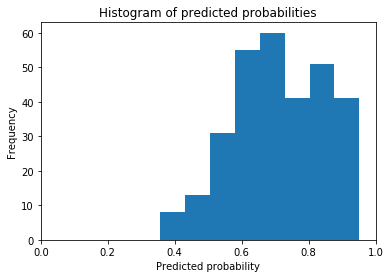

In [177]:
plt.hist(y2_pred_logreg_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

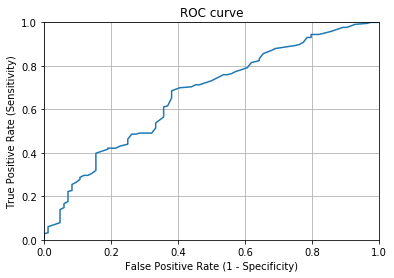

In [178]:
fpr, tpr, thresholds = metrics.roc_curve(y2_test, y2_pred_logreg_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [179]:
print(metrics.roc_auc_score(y2_test, y2_pred_logreg_prob))

0.6682098765432101


In [180]:
cross_val_score(logreg, X, y2, cv=10, scoring='roc_auc').mean()

0.6794105629948273

# Third Model: GaussianNB

In [183]:
from sklearn.naive_bayes import GaussianNB

In [184]:
GNB= GaussianNB()

In [185]:
#1

GNB.fit(X_train, y1_train)

GaussianNB(priors=None)

In [186]:
y1_pred_GNB = GNB.predict(X_test)
y1_pred_GNB

array(['F', 'C', 'C', 'F', 'F', 'C', 'F', 'C', 'C', 'C', 'F', 'F', 'C',
       'F', 'F', 'F', 'C', 'C', 'F', 'C', 'C', 'F', 'F', 'F', 'F', 'C',
       'F', 'F', 'C', 'F', 'C', 'F', 'C', 'D', 'C', 'F', 'F', 'D', 'D',
       'C', 'F', 'F', 'C', 'F', 'F', 'F', 'F', 'C', 'F', 'C', 'F', 'B',
       'F', 'F', 'C', 'F', 'C', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'D', 'F', 'F', 'C', 'F',
       'F', 'F', 'C', 'F', 'F', 'C', 'C', 'F', 'F', 'F', 'F', 'F', 'C',
       'F', 'F', 'F', 'F', 'C', 'C', 'A', 'F', 'C', 'D', 'F', 'C', 'F',
       'F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'F', 'C', 'F', 'C', 'C',
       'C', 'A', 'F', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'D', 'C', 'F',
       'D', 'A', 'C', 'F', 'C', 'F', 'F', 'F', 'F', 'F', 'C', 'F', 'C',
       'C', 'C', 'F', 'F', 'F', 'C', 'F', 'F', 'F', 'F', 'C', 'C', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'D', 'F', 'F', 'F', 'C', 'D', 'C',
       'F', 'D', 'F', 'C', 'F', 'D', 'C', 'C', 'F', 'D', 'C', 'F

In [187]:
GNB.score(X_test, y1_test)

0.31333333333333335

In [188]:
cross_val_score(GNB, X, y1, cv=10, scoring='accuracy').mean()

0.34290179572742296

In [189]:
#2

GNB.fit(X_train, y2_train)

GaussianNB(priors=None)

In [190]:
y2_pred_GNB = GNB.predict(X_test)
y2_pred_GNB

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], d

In [191]:
GNB.score(X_test, y2_test)

0.74

In [192]:
cross_val_score(GNB, X, y2, cv=10, scoring='accuracy').mean()

0.7170817081708172

Error Models

- Classification accuracy

In [194]:
# Comparing the true and predicted response values

# print the first 25 true and predicted responses
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_GNB[0:25])

True: [0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0]
Pred: [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


In [195]:
print(metrics.accuracy_score(y2_test, y2_pred_GNB))

0.74


- Confusion accuracy

In [196]:
print(metrics.confusion_matrix(y2_test, y2_pred_GNB))

[[ 18  66]
 [ 12 204]]


In [197]:
confusion = metrics.confusion_matrix(y2_test, y2_pred_GNB)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [198]:
# Classification Accuracy:

print((TP + TN) / float(TP + TN + FP + FN))

0.74


In [199]:
# Classification Error (or: Misclassification Rate):

print((FP + FN) / float(TP + TN + FP + FN))

0.26


In [200]:
# Sensitivity (or: True Positive Rate\ Recall)

print(TP / float(TP + FN))

0.9444444444444444


In [201]:
# False Positive Rate: 
# When the actual value is negative, how often is the prediction incorrect?

print(FP / float(TN + FP))

0.7857142857142857


In [202]:
# Precision: 

print(TP / float(TP + FP))

0.7555555555555555


In [203]:
print(classification_report(y2_test, y2_pred_GNB))

             precision    recall  f1-score   support

          0       0.60      0.21      0.32        84
          1       0.76      0.94      0.84       216

avg / total       0.71      0.74      0.69       300



- ROC Curve and Area Under the Curve (AUC)

In [204]:
y2_pred_GNB_prob = GNB.predict_proba(X_test)[:, 1]
y2_pred_GNB_prob

array([0.67977688, 0.95390931, 0.92372387, 0.52413554, 0.53951593,
       0.76390799, 0.38804009, 0.92866105, 0.89566017, 0.76390799,
       0.63071568, 0.64714723, 0.87003883, 0.59394239, 0.69929514,
       0.53951593, 0.8583546 , 0.87003883, 0.67052697, 0.87566307,
       0.86519492, 0.64714723, 0.59394239, 0.46485717, 0.63071568,
       0.76390799, 0.67977688, 0.53464301, 0.81229755, 0.67052697,
       0.80808982, 0.5717734 , 0.8541998 , 0.75671012, 0.78813152,
       0.41949132, 0.53951593, 0.83446831, 0.7990832 , 0.76390799,
       0.67052697, 0.61612874, 0.81229755, 0.61612874, 0.47545387,
       0.70057615, 0.38804009, 0.95390931, 0.50202455, 0.93172946,
       0.60407283, 0.94568372, 0.36310336, 0.45713347, 0.88947214,
       0.60407283, 0.76390799, 0.70057615, 0.89898961, 0.88947214,
       0.73085103, 0.89098946, 0.92274135, 0.8583546 , 0.86519492,
       0.52413554, 0.57242898, 0.73403957, 0.53464301, 0.64714723,
       0.59565669, 0.59565669, 0.71845384, 0.75671012, 0.73132

Text(0,0.5,'Frequency')

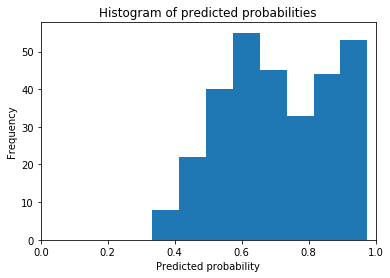

In [205]:
plt.hist(y2_pred_GNB_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

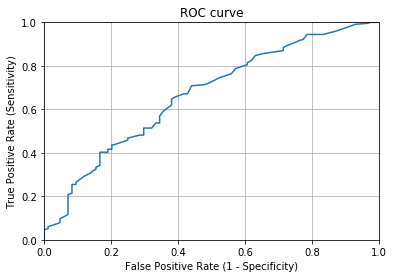

In [206]:
fpr, tpr, thresholds = metrics.roc_curve(y2_test, y2_pred_GNB_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [207]:
print(metrics.roc_auc_score(y2_test, y2_pred_GNB_prob))

0.6662808641975307


In [208]:
cross_val_score(GNB, X, y2, cv=10, scoring='roc_auc').mean()

0.681015691852263

In [209]:
# the AUC is pretty poor, the separation between the people who fail the test and the passes is not very clear and therefore the model can not guess the result well enough.

**Summary:** 

- I think the best model is the one that has the lowest value of FP (or: the lowest value of False Positive Rate- When the actual value is negative, how often is the prediction incorrect?).
- FP this is when we tell someone that he will pass the test, but in the end he does not pass. 
- This is the worst mistake in my eyes because then the student allows himself to be scornful and not invest in learning for the test.
- On the other hand, an FN error, telling the student that he will not pass the test but he will, this is better because the student will invest more in learning and get a better grade. 
- So the best of the three models I've tested is the third Model: **GaussianNB. 
- if I choose the treshold to be lower than 0.5, the FP error will be reduced, but also the TP Rate. 